# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.16.2


## Creating data to view and fit

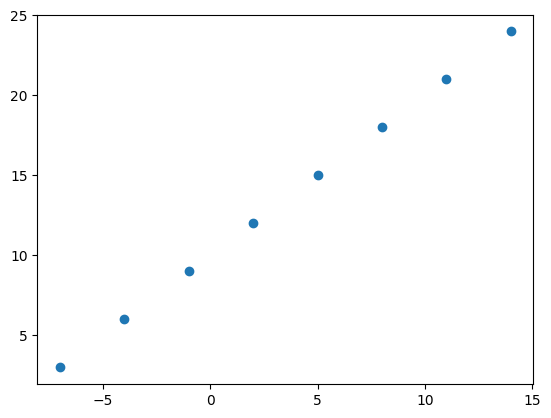

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create Features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create Labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);


In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

2024-11-29 12:16:37.192271: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-11-29 12:16:37.192297: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-11-29 12:16:37.192306: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-11-29 12:16:37.192482: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-29 12:16:37.192525: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0], y[0]

(-7.0, 3.0)

In [6]:
X[1], y[1]

(-4.0, 6.0)

In [7]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [8]:
X[0].ndim

0

In [9]:
# Turn our NumPy arrays into tensors with dtype float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [10]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

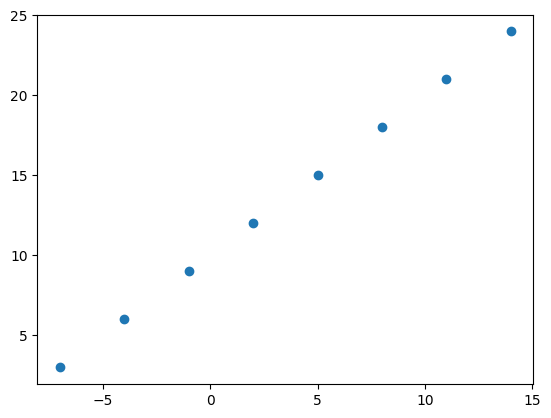

In [11]:
plt.scatter(X, y)

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.

2. **Compiling a model** - define the loss funtion (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
Fitting a model - letting the model try to find patterns between X & y (features and labels).

3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

In [12]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochasitc gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5


2024-11-29 12:16:37.658597: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step - loss: 15.0154 - mae: 15.0154
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 14.8190 - mae: 14.8190
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 14.6865 - mae: 14.6865
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 14.5540 - mae: 14.5540
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 14.4215 - mae: 14.4215


In [13]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [14]:
# Try and make a prediction using our model
c = np.array([17])
c = tf.cast(tf.constant(c), dtype = tf.float32)
c = tf.expand_dims(c, axis = 0)

y_pred = model.predict(c)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


array([[-4.015726]], dtype=float32)

In [15]:
y_pred + 16

array([[11.984274]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hideen layers, change the activation function of each layer.

2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.

3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [16]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochasitc gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step - loss: 10.9694 - mae: 10.9694
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 10.8369 - mae: 10.8369
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 10.7044 - mae: 10.7044
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 10.5719 - mae: 10.5719
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 10.4394 - mae: 10.4394
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 10.3069 - mae: 10.3069
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 10.1744 - mae: 10.1744
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 10.0419 - mae: 10.0419
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 9.9094 - mae: 9.9094
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 9.7769 - mae: 9.7769
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 9.6444 - mae: 9.6444
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 9.5119 - mae: 9.5119
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━

In [17]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [18]:
c

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[17.]], dtype=float32)>

In [19]:
# Let's see if our model's prediction has improved
model.predict(c)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


array([[29.771242]], dtype=float32)

In [20]:
# Set random seed
tf.random.set_seed(42)

# Let's see if we can make another to improve our model

# 1. Create a model using the Sequential API (This time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # sgd is short for stochasitc gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 731ms/step - loss: 14.2349 - mae: 14.2349
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 13.5389 - mae: 13.5389
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 12.8438 - mae: 12.8438
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 12.1471 - mae: 12.1471
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 11.4464 - mae: 11.4464
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 10.7394 - mae: 10.7394
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 10.0240 - mae: 10.0240
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 9.2976 - mae: 9.2976
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 8.5571 - mae: 8.5571
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 7.7997 - mae: 7.7997
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 7.0223 - mae: 7.0223
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 6.6736 - mae: 6.6736
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━

In [21]:
# Let's see if our model's prediction has improved
model.predict(c)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


array([[27.361414]], dtype=float32)

## Evaluting a model

In practice, a typical workflow you'll go through when building neural networks is:

```
Build a model  -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

When it comes to evaluation... there are 3 words you should memorize:

> "Visualize, visualize, visualize"

It's a good idea to visualize:

* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [22]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [23]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

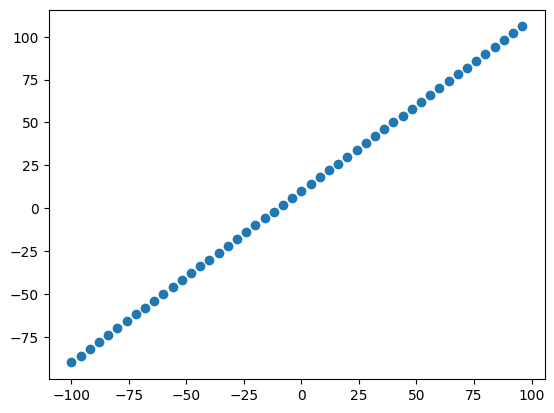

In [24]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, y)

### The 3 sets...

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.

* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.

* **Test set** - the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data available.

In [25]:
# Check the length of how many samples we have
len(X)

50

In [26]:
# Split the data into train and test sets
X_train = X[:40] # First 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in training and test sets...let's visualize it again!

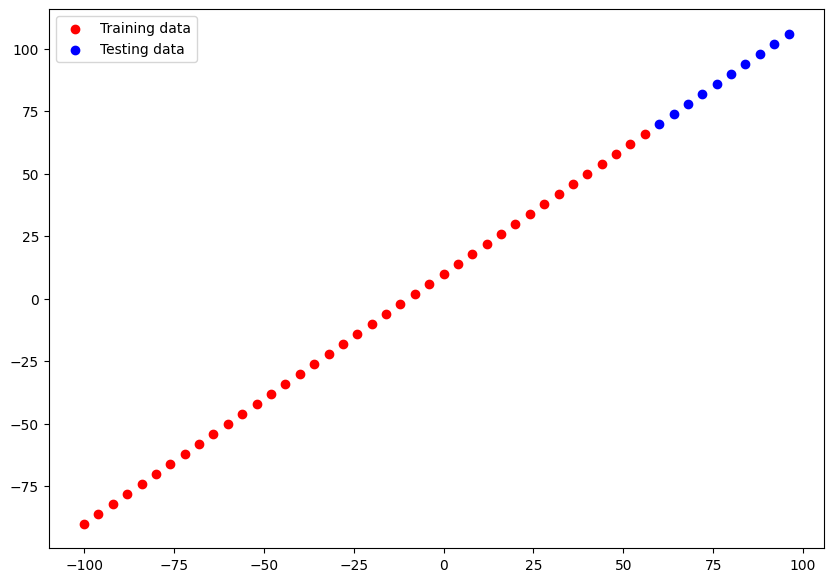

In [27]:
plt.figure(figsize=(10, 7))

plt.scatter(X_train, y_train, c="r", label="Training data") # Our model will learn on this


plt.scatter(X_test, y_test, c="b", label="Testing data") # Want our model to be able to predict this (given X, what's y?)

# Show a legend
plt.legend();

In [28]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochasitc gradient descent
              metrics=["mae"])

# 3. Fit the model
# model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

### Visualizing the model

In [29]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [30]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [31]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1. Create a model (Same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # sgd is short for stochasitc gradient descent
              metrics=["mae"])

/opt/anaconda3/envs/tensorflow_venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49 (196.00 B)

 Trainable params: 49 (196.00 B)

 Non-trainable params: 0 (0.00 B)

* **Total params** - total number of parameters in the model.

* **Trainable parameters** - these are the parameters (patterns) the model can update as it trains.

* **Non-trainable params** - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**).

In [33]:
# Let's fit our model to the training data
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [34]:
# Get a summary of our model
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 149 (600.00 B)

 Trainable params: 49 (196.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 100 (404.00 B)

#### Visualizing a model's layers

In [35]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model's predictions).

In [36]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


array([[ 69.67876 ],
       [ 73.671036],
       [ 77.66331 ],
       [ 81.65558 ],
       [ 85.64785 ],
       [ 89.64013 ],
       [ 93.632385],
       [ 97.624664],
       [101.616936],
       [105.60921 ]], dtype=float32)

In [37]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🔑 Note: If you feel like you're going to reuse some kind of functionality in the future, it's a good idea to turn it into a function.

In [38]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="r", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="b", label="Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="g", label="Predictions")
  # Show the legend
  plt.legend();

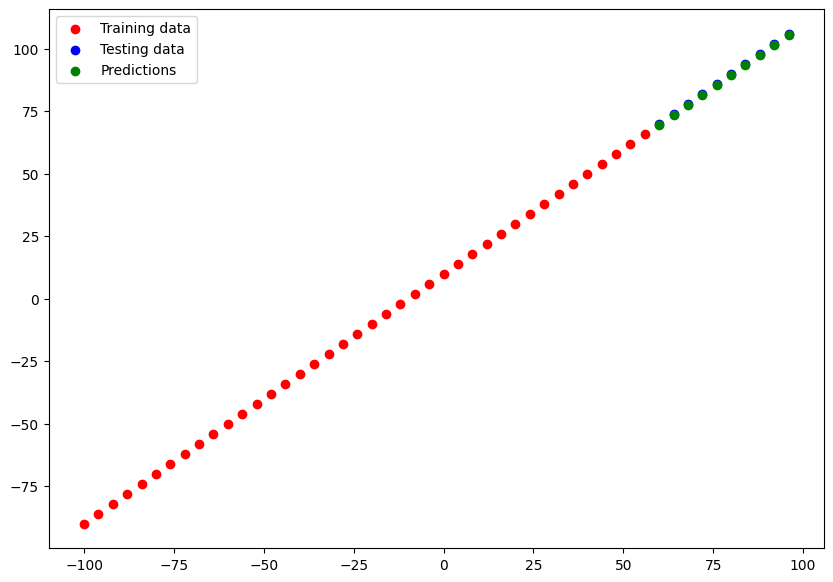

In [39]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### Evaluting our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:

* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors"

In [40]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - loss: 0.3560 - mae: 0.3560


[0.35601502656936646, 0.35601502656936646]

In [41]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 69.67876 ],
       [ 73.671036],
       [ 77.66331 ],
       [ 81.65558 ],
       [ 85.64785 ],
       [ 89.64013 ],
       [ 93.632385],
       [ 97.624664],
       [101.616936],
       [105.60921 ]], dtype=float32)>

In [42]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [43]:
mae_object = tf.keras.losses.MeanAbsoluteError()
mae = mae_object(y_test, tf.squeeze(y_pred))
mae, mae.numpy()

(<tf.Tensor: shape=(), dtype=float32, numpy=0.35601503>, 0.35601503)

In [44]:
# Calculate the mean square error
mse_object = tf.keras.metrics.MeanSquaredError()
mse = mse_object(y_test, tf.squeeze(y_pred))
mse, mse.numpy()

(<tf.Tensor: shape=(), dtype=float32, numpy=0.12723944>, 0.12723944)

In [45]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  mae_object = tf.keras.losses.MeanAbsoluteError()
  return mae_object(y_true, tf.squeeze(y_pred))
  
def mse(y_true, y_pred):
  mse_object = tf.keras.metrics.MeanSquaredError()
  return mse_object(y_true, tf.squeeze(y_pred))

In [46]:
mae(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=0.35601503>

In [47]:
mse(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=0.12723944>

### Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it ...
```

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).

2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.

3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:

1. `model_1` - 2 Dense layer, trained for 100 epochs, Adam optimizer
2. `model_2` - 3 layers, trained for 100 epochs
3. `model_3` - 3 layers, trained for 500 epochs

**Model 1**

> 2 Dense layer, trained for 100 epochs, Adam optimizer

In [48]:
tf.random.set_seed(42)

# 1. Create a model (Same as above)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[1], name="input_layer"),
    tf.keras.layers.Dense(16, name="hidden_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # sgd is short for stochasitc gradient descent
              metrics=["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [49]:
X_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>

In [50]:
# Make predictions for model_1
y_pred_1 = model_1.predict(X_test)
y_pred_1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


array([[ 70.59126],
       [ 74.62875],
       [ 78.66624],
       [ 82.70372],
       [ 86.74121],
       [ 90.7787 ],
       [ 94.81618],
       [ 98.85368],
       [102.89117],
       [106.92866]], dtype=float32)

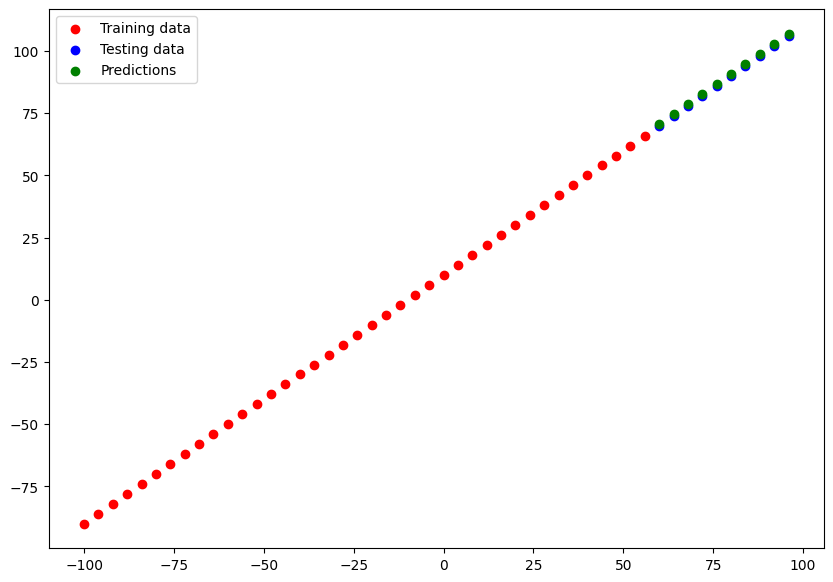

In [51]:
# Plot predictions for model_1
plot_predictions(predictions=y_pred_1)

In [52]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=0.75995713>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.58912903>)

**Model 2**

> 3 Dense layer, trained for 100 epochs, Adam optimizer

In [53]:
tf.random.set_seed(42)

# 1. Create a model (Same as above)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[1], name="input_layer"),
    tf.keras.layers.Dense(16, name="hidden_layer_1"),
    tf.keras.layers.Dense(16, name="hidden_layer_2"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_2")

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # sgd is short for stochasitc gradient descent
              metrics=["mae"])

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [54]:
# Make predictions for model_2
y_pred_2 = model_2.predict(X_test)
y_pred_2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


array([[ 68.67499],
       [ 72.58974],
       [ 76.50447],
       [ 80.41922],
       [ 84.33396],
       [ 88.2487 ],
       [ 92.16343],
       [ 96.07817],
       [ 99.99292],
       [103.90765]], dtype=float32)

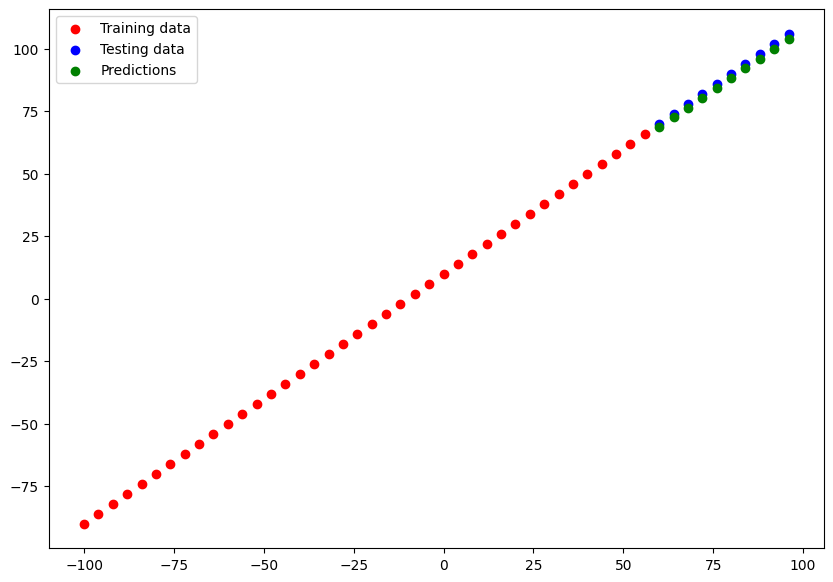

In [55]:
# Plot predictions for model_2
plot_predictions(predictions=y_pred_2)

In [56]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=1.7086747>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2.97954>)

**Model 3**

> 3 Dense layer, trained for 500 epochs, Adam optimizer

In [57]:
tf.random.set_seed(42)

# 1. Create a model (Same as above)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[1], name="input_layer"),
    tf.keras.layers.Dense(16, name="hidden_layer_1"),
    tf.keras.layers.Dense(16, name="hidden_layer_2"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_3")

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # sgd is short for stochasitc gradient descent
              metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0)

In [58]:
# Make predictions for model_3
y_pred_3 = model_3.predict(X_test)
y_pred_3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


array([[ 70.03305 ],
       [ 74.035164],
       [ 78.0373  ],
       [ 82.03941 ],
       [ 86.041534],
       [ 90.04367 ],
       [ 94.04579 ],
       [ 98.04791 ],
       [102.050026],
       [106.05216 ]], dtype=float32)

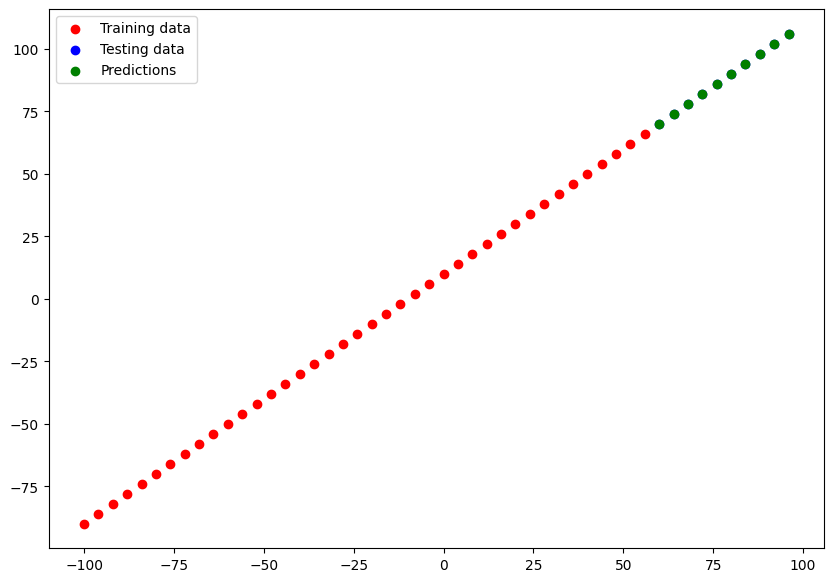

In [59]:
# Plot predictions for model_3
plot_predictions(predictions=y_pred_3)

In [60]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, y_pred_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=0.04260254>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.0018521767>)

🔑 Note: You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary.

### Comparing the results of our experiments

We've run a few experiments, let's compare the results.

In [61]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,0.759957,0.589129
1,model_2,1.708675,2.979540
2,model_3,0.042603,0.001852


Looks like model_2 performed the best...

In [62]:
model_2.summary()

Model: "model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 965 (3.77 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 644 (2.52 KB)

## Saving our models

Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or a mobile app.

There are two main formats we can save our model's too:

1. The SavedModel format
2. The HDF5 format

In [63]:
# Save model using the SaveModel format
model_2.save("models/best_model_SavedModel_format.keras")

In [64]:
# Save model using the HDF5 format
model_2.save("models/best_model_HDF5_format.h5")

## Loading in a saved model

In [65]:
loaded_SavedModel_format = tf.keras.models.load_model("models/best_model_SavedModel_format.keras")
loaded_SavedModel_format.summary()

Model: "model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 965 (3.77 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 644 (2.52 KB)

In [66]:
model_2.summary()

Model: "model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 965 (3.77 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 644 (2.52 KB)

In [67]:
# Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)

loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)

model_2_preds == loaded_SavedModel_format_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [68]:
mae(y_test, model_2_preds) == mae(y_test, loaded_SavedModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [69]:
# Load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("models/best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 323 (1.27 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [70]:
# Check to see if loaded .h5 model predictions match model_2
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## A larger example

In [71]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [73]:
# Let's try one-hot encode our DataFrame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [74]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [75]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False


In [76]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [77]:
# Create training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [93]:
X_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,True,False,True,False,False,True,False,False
1285,47,24.320,0,True,False,True,False,True,False,False,False
1142,52,24.860,0,True,False,True,False,False,False,True,False
969,39,34.320,5,True,False,True,False,False,False,True,False
486,54,21.470,3,True,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,True,False,True,False,True,False,False,False
1130,39,23.870,5,True,False,True,False,False,False,True,False
1294,58,25.175,0,False,True,True,False,True,False,False,False
860,37,47.600,2,True,False,False,True,False,False,False,True


In [95]:
# Build a neural network (sort of like model_2 above)
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae, 
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10177.9141 - mae: 10177.9141
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7695.1768 - mae: 7695.1768
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7587.8696 - mae: 7587.8696
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7591.9009 - mae: 7591.9009
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7594.2168 - mae: 7594.2168
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7400.1538 - mae: 7400.1538
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7360.5786 - mae: 7360.5786
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7715.1396 - mae: 7715.1396
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7280.4009 - mae: 7280.4009
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7179.2881 - mae: 7179.2881
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7888.4028 - mae: 7888.4028
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/ste

In [96]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6131.3818 - mae: 6131.3818


[5988.03564453125, 5988.03564453125]

In [97]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Right now it looks like our model isn't performing too well...let's try and improve it!

To (try) improve our model, we'll run 2 experiments:

1. Add an extra layer with more hidden units and use the Adam optimizer
2. Same as above but train for longer (200 epochs)
3. (insert your own experiment here)

In [100]:
# Build a neural network (sort of like model_2 above)
tf.random.set_seed(42)

# 1. Create a model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae, 
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                        metrics=["mae"])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [101]:
insurance_model_2.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3236.3638 - mae: 3236.3638 


[3172.9140625, 3172.9140625]

In [107]:
# Build a neural network (sort of like model_2 above)
tf.random.set_seed(42)

# 1. Create a model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae, 
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                        metrics=["mae"])

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 12635.2324 - mae: 12635.2324
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 7554.7900 - mae: 7554.7900
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 7225.0049 - mae: 7225.0049
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7011.3794 - mae: 7011.3794
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6731.0098 - mae: 6731.0098
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 6402.3291 - mae: 6402.3291
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 6242.3257 - mae: 6242.3257
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 6109.5215 - mae: 6109.5215
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 5960.5488 - mae: 5960.5488
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 5760.7583 - mae: 5760.7583
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 5494.5112 - mae: 5494.5112
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━━━━

In [108]:
insurance_model_3.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3221.1406 - mae: 3221.1406 


[3158.556396484375, 3158.556396484375]

Text(0.5, 0, 'epochs')

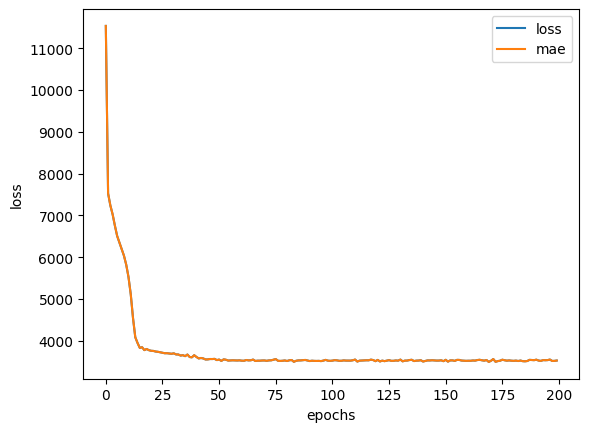

In [115]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

> 🤔 Question: How long should you train for?

It depends. Really... it depends on the problem you're working on. However, many people have asked this question before... so TensorFlow has a solution! It's called the ***[EarlyStopping Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)***, which is a TensorFlow component you can add to your model to stop training once it stops improving a certain metric.

## Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization.

If you're not sure on which to use, you could try both and see which performs better.

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow a few classes from Scikit-Learn.

In [118]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder 
from sklearn.model_selection import train_test_split
 
# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)


# Create X and y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [119]:
# What does our data look like now?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [120]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [121]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Beautiful! Our data has been normalized and one hot encoded. Now let's build a neural network model on it and see how it goes.